# Search relevancy

We will analyze an hour of anonymized search data from 14/10/2020, for the Android client platform. We aim to evaluate search relevancy from the data provided.

## Load and explore data

In [1]:
import pandas as pd
import seaborn as sns
import ast

initiate_search = pd.read_csv('initiate_search.csv')
search_result = pd.read_csv('search_result.csv')
search_query = pd.read_csv('search_query.csv')
click_search = pd.read_csv('click_search.csv')

In [2]:
initiate_search.head(2)

,event_name,searchUuid,method,event_ts,dt,user_id
0,initiate_search,13332dd0-848e-40ad-9427-c57f5b8d7fe0,clickInBar,1602638935065,2020-10-14,377
1,initiate_search,7c7044b0-bc2c-440a-a016-40196dcc1fed,clickInBar,1602640121219,2020-10-14,249


In [3]:
search_result.head(2)

,event_name,query,searchUuid,queryUuid,event_ts,dt,user_id
0,search_result,ill bomb,048cb5b1-e39e-4fb8-819d-10f27aafe614,b51b2cbf-d801-4717-b78f-f964d80ca35c,1602638441881,2020-10-14,212
1,search_result,cut w,a4bee6f3-1d3b-4894-b45c-b694011cedfe,f284f6ad-72aa-467c-ae8d-a0396983d68e,1602639204167,2020-10-14,25


In [4]:
search_query.head(2)

,event_name,query,queryId,topresults,trackresults,artistresults,albumresults,videoresults,playlistresults,responseTime,dt,user_id
0,search_query,art of story telling pt,00db2706-a334-41f1-aeb5-bac027618ff3,[],[],[],[],[],[],"{track=19, video=7, artist=17, album=19, playl...",2020-10-14,258
1,search_query,Rick,0a98a77d-270c-44f0-a7a7-d7c39a45fd86,"[{id=24995, contenttype=Artist}]","[{id=99796344, popularityww=82, popularitycoun...","[{id=24995, popularityww=99, popularitycountry...","[{id=4167836, popularityww=96, popularitycount...","[{id=65646214, popularityww=53, popularitycoun...","[{id=198350027, popularityww=86, popularitycou...","{track=41, video=7, artist=53, album=25, playl...",2020-10-14,351


In [5]:
click_search.head(2)

,event_name,queryUuid,pageId,endResult,contentType,contentId,contentPlacement,searchUuid,event_ts,dt,user_id
0,click_search,329f9073-60ae-4819-b5fe-c6a6f340f74c,search,navigation,artist,3619453,0,1eddb4fd-829c-4971-bdc8-6af380a98626,1602640556158,2020-10-14,194
1,click_search,f01bed2f-ea3e-430b-a691-b4241324d9a8,search,navigation,artist,3646659,0,6b2cdbd1-bb13-44ba-97d9-84e76c8a18b4,1602471803424,2020-10-14,56


In [6]:
initiate_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_name  611 non-null    object
 1   searchUuid  611 non-null    object
 2   method      611 non-null    object
 3   event_ts    611 non-null    int64 
 4   dt          611 non-null    object
 5   user_id     611 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 28.8+ KB


In [7]:
search_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_name  1320 non-null   object
 1   query       1320 non-null   object
 2   searchUuid  1320 non-null   object
 3   queryUuid   1320 non-null   object
 4   event_ts    1320 non-null   int64 
 5   dt          1320 non-null   object
 6   user_id     1320 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 72.3+ KB


In [8]:
search_query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   event_name       1065 non-null   object
 1   query            1065 non-null   object
 2   queryId          1065 non-null   object
 3   topresults       1065 non-null   object
 4   trackresults     1065 non-null   object
 5   artistresults    1065 non-null   object
 6   albumresults     1065 non-null   object
 7   videoresults     1065 non-null   object
 8   playlistresults  1065 non-null   object
 9   responseTime     1065 non-null   object
 10  dt               1065 non-null   object
 11  user_id          1065 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 100.0+ KB


In [9]:
click_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   event_name        422 non-null    object
 1   queryUuid         422 non-null    object
 2   pageId            422 non-null    object
 3   endResult         422 non-null    object
 4   contentType       422 non-null    object
 5   contentId         422 non-null    object
 6   contentPlacement  422 non-null    int64 
 7   searchUuid        422 non-null    object
 8   event_ts          422 non-null    int64 
 9   dt                422 non-null    object
 10  user_id           422 non-null    int64 
dtypes: int64(3), object(8)
memory usage: 36.4+ KB


We find no obvious null values in any of the dataframes that we should worry about for now (although 'object'/string types might contain entries that are equivalent to null when parsed).

## Number of search sessions

We are going to start with a bit exploration of the 4 data frames to get a sense of how they are related, how many unique IDs for searches and queries they contain and how that is related to their size.

In [10]:
initiate_search['event_name'].unique()

array(['initiate_search'], dtype=object)

In [11]:
initiate_search['method'].unique()

array(['clickInBar', 'deleteSearch', 'searchButton'], dtype=object)

In [12]:
initiate_search['searchUuid'].unique().size

611

In [13]:
search_result['searchUuid'].unique().size

434

In [14]:
search_result['queryUuid'].unique().size

1286

In [15]:
search_result['queryUuid'].value_counts()[:35]

offline                                 5
6cdb62fb-3b2d-4e0b-9490-48dcb969a622    3
eb1cf852-38e7-4769-8361-3ce45e58755a    3
8d72f1c4-b0da-4d24-8dff-a9de333cd0bf    3
5eae8704-4fdd-4037-a834-56e2f948f584    2
c8582156-76a1-4430-b672-0d0290226446    2
ad16ae12-3939-4be8-b485-a8f84bcba256    2
8b5f57fa-244a-45d6-93f9-177b451a2677    2
7c9d6c26-3092-454b-9a56-f46ff495ade2    2
bc809275-bac9-4526-b197-36a087566c3f    2
576afd27-ca81-4286-acf9-200a46ea738e    2
497d55ad-b4b1-4f1c-a8c9-45223d32f86d    2
e5af1e68-8574-46bc-ad99-ac9ae796587b    2
91936044-99cc-4788-b898-72296ecb72da    2
1eb1f753-f0ed-4e3e-ba75-ace4dc118166    2
fede9b26-084d-4b18-93b3-6f2fd893fe7a    2
6667cd1a-ccd5-4092-9ed1-52b4ac711e3d    2
f1df0192-732d-4631-8c63-57b3e5684475    2
25cdd1f3-c964-4623-b827-16a154a1a589    2
73c75fe1-a5d5-4430-8da6-cb8d77729fa1    2
35321f46-fa67-4e0b-bf49-a5d403ec53c8    2
0ae1b3c2-42b4-4359-9d8d-3bc5b524cb05    2
1d1c205f-4967-4cd0-99a7-38746100cc0c    2
791996f1-318e-4e71-9149-adccb52ef5

We can see that 5 of the queries were performed while offline, then there are a few query ids that appear 3 or 2 times in the data frame, and all the rest of the entries have unique query ids.

In [16]:
search_result[search_result['queryUuid'] == '8d72f1c4-b0da-4d24-8dff-a9de333cd0bf']

,event_name,query,searchUuid,queryUuid,event_ts,dt,user_id
1006,search_result,nr,fe76177e-9c5d-4e14-baed-ce7f1922c901,8d72f1c4-b0da-4d24-8dff-a9de333cd0bf,1602639623691,2020-10-14,32
1100,search_result,nr,fe76177e-9c5d-4e14-baed-ce7f1922c901,8d72f1c4-b0da-4d24-8dff-a9de333cd0bf,1602639617986,2020-10-14,32
1190,search_result,nr,fe76177e-9c5d-4e14-baed-ce7f1922c901,8d72f1c4-b0da-4d24-8dff-a9de333cd0bf,1602639626118,2020-10-14,32


In [17]:
search_result[search_result['queryUuid'] == 'eb1cf852-38e7-4769-8361-3ce45e58755a']

,event_name,query,searchUuid,queryUuid,event_ts,dt,user_id
1051,search_result,n,fe76177e-9c5d-4e14-baed-ce7f1922c901,eb1cf852-38e7-4769-8361-3ce45e58755a,1602639615014,2020-10-14,32
1140,search_result,n,fe76177e-9c5d-4e14-baed-ce7f1922c901,eb1cf852-38e7-4769-8361-3ce45e58755a,1602639627759,2020-10-14,32
1151,search_result,n,fe76177e-9c5d-4e14-baed-ce7f1922c901,eb1cf852-38e7-4769-8361-3ce45e58755a,1602639624234,2020-10-14,32


It looks like the duplicate entries have the same query text by the same user and correspond to the same respective search ids, but were just performed at different times.

Users initiated a search (as defined) 611 times, but only performed at least a query in 434 of those initiated searches.

In [18]:
search_query['queryId'].shape

(1065,)

In [19]:
search_query['queryId'].unique().size

1065

In [20]:
click_search.shape

(422, 11)

In [21]:
click_search['searchUuid'].unique().size

353

In [22]:
click_search['queryUuid'].unique().size

359

In [23]:
click_search['queryUuid'].value_counts()

b96e7967-a8bf-47d1-a2e2-2d67b1e8d0a8    11
8053acbd-1d4e-4551-96bf-238b8337bdcd     7
11bd110a-826d-4648-9b5f-d0233093de32     4
7b2e510f-49d5-4c45-8284-de4aa4aff60e     4
6161383c-6a36-4af7-be6a-31b0375b358c     3
                                        ..
f8460131-c9e4-4486-9958-7674a3e07c96     1
7a7e96d3-0288-4c46-9e9a-ba728f19af15     1
b91677c6-28a6-4c6f-80d1-c2a4880c6f2c     1
65ad225a-9509-4f7e-8b30-c3288b4389ed     1
497d55ad-b4b1-4f1c-a8c9-45223d32f86d     1
Name: queryUuid, Length: 359, dtype: int64

In [24]:
click_search['endResult'].unique()

array(['navigation', 'playback'], dtype=object)

If we consider a click on content the successful completion of a search session, then there were 353 search sessions that completed successfully, and 359 total queries that resulted in a click.

611 searches were initiated by users. Of these, 434 had queries performed.

We can say that the total number of searche sessions initiated was 611.

If we want to consider only search sessions for which some query was actually performed (as opposed to accidentaly clicking the search bar or button, abandoning the search after clicking, or deleting the search bar content without typing in a new search), then there were 434 attempted searches.

## Distribution of clicks by content type

We will look at the number of clicks per type of content clicked.

In [25]:
click_search['contentType'].unique()

array(['artist', 'track', 'playlist', 'album', 'video'], dtype=object)

In [26]:
click_search['contentType'].value_counts()

artist      234
track       141
album        35
playlist     11
video         1
Name: contentType, dtype: int64

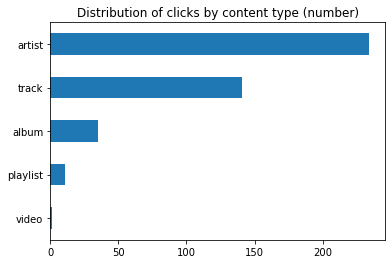

In [27]:
click_search['contentType'].value_counts(ascending=True).plot.barh(title='Distribution of clicks by content type (number)')

In [28]:
click_search['contentType'].value_counts(normalize=True)*100.

artist      55.450237
track       33.412322
album        8.293839
playlist     2.606635
video        0.236967
Name: contentType, dtype: float64

A pie chart can be not the best type of plot for assessing magnitude ratios, but it's a different way to look at it.

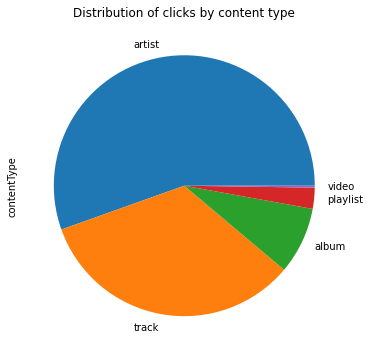

In [29]:
click_search['contentType'].value_counts(normalize=True).plot.pie(title='Distribution of clicks by content type', figsize=(6,6))

We will return to bar plots and check the fractional distribution of content type clicked.

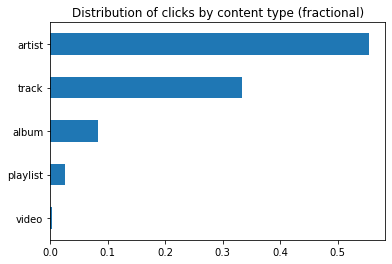

In [30]:
click_search['contentType'].value_counts(normalize=True, ascending=True).plot.barh(title='Distribution of clicks by content type (fractional)')

Of the search result clicks, 55.45% are on an artist, 33.31% are on a track, 8.29% are on an album, 2.61% are on a playlist, and 0.24% are on a video.

## Average length of queries

Wel will consider all queries registered in the `search_result` table.

In [31]:
search_result['query']

0          ill bomb
1             cut w
2       the dialogu
3                 I
4            u remi
           ...     
1315           oh ñ
1316           joji
1317            slo
1318         lift e
1319         boohle
Name: query, Length: 1320, dtype: object

In [32]:
search_result['query'].apply(len)

0        8
1        5
2       11
3        1
4        6
        ..
1315     4
1316     4
1317     3
1318     6
1319     6
Name: query, Length: 1320, dtype: int64

In [33]:
search_result['query'].apply(len).mean()

6.721212121212122

The average length of a query is 6.72 characters. It looks like users don't have to type too many characters on average when looking for content. 

There are, however, some queries within a search session registered progressively as 'a', 'ab', 'abc'... as the user waits for some result while they type, so this effect might lower the average query length.

## Clickthrough rate (CTR)

In [34]:
check_join = pd.merge(left=search_result, right=click_search, how='inner',on=['queryUuid','searchUuid'])
check_join.head()

,event_name_x,query,searchUuid,queryUuid,event_ts_x,dt_x,user_id_x,event_name_y,pageId,endResult,contentType,contentId,contentPlacement,event_ts_y,dt_y,user_id_y
0,search_result,ill bomb,048cb5b1-e39e-4fb8-819d-10f27aafe614,b51b2cbf-d801-4717-b78f-f964d80ca35c,1602638441881,2020-10-14,212,click_search,search,playback,track,35987435,0,1602638443516,2020-10-14,212
1,search_result,ill bomb,048cb5b1-e39e-4fb8-819d-10f27aafe614,b51b2cbf-d801-4717-b78f-f964d80ca35c,1602638441881,2020-10-14,212,click_search,search,playback,track,76890165,1,1602638599476,2020-10-14,212
2,search_result,ja rul,714f256e-6529-4e8a-8624-4478e6ac9704,220053b0-5440-451c-bd12-982ceac1e5c3,1602639517150,2020-10-14,353,click_search,search,navigation,artist,29923,0,1602639519226,2020-10-14,353
3,search_result,vibe 2 ch,1d9d782e-4e61-4166-9712-9d233f8e54e9,9b5499de-5d01-436d-81eb-956523ab6517,1602628569334,2020-10-14,284,click_search,search,playback,track,74880930,0,1602628569963,2020-10-14,284
4,search_result,unthan,7fb01464-b3d3-4155-86b7-db1eedf882be,108b34b1-77d7-45b1-bc91-34f78802f776,1602637528301,2020-10-14,223,click_search,search,navigation,artist,3642042,0,1602637529562,2020-10-14,223


It looks like some of the duplicate `search_result` objects have different `click_search` correspondents, which makes sense. A user might perform the same search query a few times, at different timepoints, perhaps as part of the same search session, and click on a different result each time. 

We want to see how many `search_query` objects have a corresponding `click_search` event. This corresponds to how many clicks we get once we have actually provided the user with some search results for their query.

We will do a left join on search results (`search_query`) with `click_search` events on the queryId to find which queries resulted in click on a result.

In [35]:
join = pd.merge(left=search_query, right=click_search, how='left',left_on='queryId', right_on='queryUuid')
join.head()

,event_name_x,query,queryId,topresults,trackresults,artistresults,albumresults,videoresults,playlistresults,responseTime,...,queryUuid,pageId,endResult,contentType,contentId,contentPlacement,searchUuid,event_ts,dt_y,user_id_y
0,search_query,art of story telling pt,00db2706-a334-41f1-aeb5-bac027618ff3,[],[],[],[],[],[],"{track=19, video=7, artist=17, album=19, playl...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,search_query,Rick,0a98a77d-270c-44f0-a7a7-d7c39a45fd86,"[{id=24995, contenttype=Artist}]","[{id=99796344, popularityww=82, popularitycoun...","[{id=24995, popularityww=99, popularitycountry...","[{id=4167836, popularityww=96, popularitycount...","[{id=65646214, popularityww=53, popularitycoun...","[{id=198350027, popularityww=86, popularitycou...","{track=41, video=7, artist=53, album=25, playl...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,search_query,greek ze,d3a75f40-a579-4ccd-809b-c9f5147bd97b,"[{id=4901667, contenttype=Artist}]","[{id=6108898, popularityww=1, popularitycountr...","[{id=4901667, popularityww=1, popularitycountr...","[{id=87320310, popularityww=1, popularitycount...",[],[],"{track=34, video=5, artist=40, album=11, playl...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,search_query,wzrd,55352145-6f85-445f-beb9-54592262928f,"[{id=4485830, contenttype=Artist}]","[{id=13701009, popularityww=35, popularitycoun...","[{id=4485830, popularityww=40, popularitycount...","[{id=13701002, popularityww=42, popularitycoun...","[{id=62457267, popularityww=2, popularitycount...",[],"{track=6, video=2, artist=6, album=6, playlist...",...,55352145-6f85-445f-beb9-54592262928f,search,navigation,artist,4485830,0.0,c31f6e54-b3e2-4f5e-be71-394d15bd0b42,1.602640e+12,2020-10-14,298.0
4,search_query,dirty money,65ce435f-5e3d-431b-8540-74f191dfe715,"[{id=3652847, contenttype=Artist}]","[{id=64048329, popularityww=33, popularitycoun...","[{id=3652847, popularityww=60, popularitycount...","[{id=2917412, popularityww=60, popularitycount...","[{id=89097144, popularityww=1, popularitycount...","[{id=31238762, popularityww=20, popularitycoun...","{track=52, video=28, artist=39, album=21, play...",...,65ce435f-5e3d-431b-8540-74f191dfe715,search,navigation,artist,3652847,0.0,3e395efc-1fcb-46ab-98a3-603799cbd8cc,1.602639e+12,2020-10-14,331.0


In [36]:
join.shape

(1099, 23)

In [37]:
search_query['queryId'].value_counts()

015691b0-98ea-46a5-95af-f91fc10634af    1
30ca2c51-ec97-4ad7-a72a-75d7b65eb611    1
d1b65fc6-0fd0-417c-ab98-3231303b55b1    1
c1e8db00-c6a5-4873-bae7-317280686f0b    1
e73bee09-4c53-4d9a-907f-6b4dcd6b86c3    1
                                       ..
c249ac6f-6684-470f-a607-edff56c37f34    1
4bbdb496-596b-4341-acb5-d2deb28ecab3    1
b58770c6-1c1f-45f1-8cc5-eb5e520d3681    1
eb3c9ea6-a017-4168-b066-fa37454febe9    1
08ac52ac-ae0b-45f0-b6ec-e922f00ed8b5    1
Name: queryId, Length: 1065, dtype: int64

In [38]:
click_search['queryUuid'].value_counts()

b96e7967-a8bf-47d1-a2e2-2d67b1e8d0a8    11
8053acbd-1d4e-4551-96bf-238b8337bdcd     7
11bd110a-826d-4648-9b5f-d0233093de32     4
7b2e510f-49d5-4c45-8284-de4aa4aff60e     4
6161383c-6a36-4af7-be6a-31b0375b358c     3
                                        ..
f8460131-c9e4-4486-9958-7674a3e07c96     1
7a7e96d3-0288-4c46-9e9a-ba728f19af15     1
b91677c6-28a6-4c6f-80d1-c2a4880c6f2c     1
65ad225a-9509-4f7e-8b30-c3288b4389ed     1
497d55ad-b4b1-4f1c-a8c9-45223d32f86d     1
Name: queryUuid, Length: 359, dtype: int64

Query ids are unique in `search_query`, but not in `click_search`.

In [39]:
click_search[click_search['queryUuid']=='b96e7967-a8bf-47d1-a2e2-2d67b1e8d0a8']

,event_name,queryUuid,pageId,endResult,contentType,contentId,contentPlacement,searchUuid,event_ts,dt,user_id
212,click_search,b96e7967-a8bf-47d1-a2e2-2d67b1e8d0a8,search_viewalltracks,playback,track,20938035,9,1f04f32c-b902-4e90-8abd-a71ffc4f4139,1601615479281,2020-10-14,8
319,click_search,b96e7967-a8bf-47d1-a2e2-2d67b1e8d0a8,search_viewalltracks,playback,track,130012259,10,1f04f32c-b902-4e90-8abd-a71ffc4f4139,1601615486978,2020-10-14,8
334,click_search,b96e7967-a8bf-47d1-a2e2-2d67b1e8d0a8,search_viewalltracks,playback,track,106589133,0,1f04f32c-b902-4e90-8abd-a71ffc4f4139,1601615455671,2020-10-14,8
349,click_search,b96e7967-a8bf-47d1-a2e2-2d67b1e8d0a8,search_viewalltracks,playback,track,106589094,4,1f04f32c-b902-4e90-8abd-a71ffc4f4139,1601615524428,2020-10-14,8
358,click_search,b96e7967-a8bf-47d1-a2e2-2d67b1e8d0a8,search,navigation,album,23918271,1,1f04f32c-b902-4e90-8abd-a71ffc4f4139,1601615616004,2020-10-14,8
365,click_search,b96e7967-a8bf-47d1-a2e2-2d67b1e8d0a8,search,navigation,playlist,ecb993a6-9448-4550-a4ab-dc12d06a5568,0,1f04f32c-b902-4e90-8abd-a71ffc4f4139,1601615707918,2020-10-14,8
369,click_search,b96e7967-a8bf-47d1-a2e2-2d67b1e8d0a8,search_viewalltracks,playback,track,59652626,5,1f04f32c-b902-4e90-8abd-a71ffc4f4139,1601615526490,2020-10-14,8
370,click_search,b96e7967-a8bf-47d1-a2e2-2d67b1e8d0a8,search_viewalltracks,playback,track,10132741,6,1f04f32c-b902-4e90-8abd-a71ffc4f4139,1601615538075,2020-10-14,8
378,click_search,b96e7967-a8bf-47d1-a2e2-2d67b1e8d0a8,search_viewalltracks,playback,track,114345469,12,1f04f32c-b902-4e90-8abd-a71ffc4f4139,1601615497877,2020-10-14,8
384,click_search,b96e7967-a8bf-47d1-a2e2-2d67b1e8d0a8,search,navigation,artist,5135403,2,1f04f32c-b902-4e90-8abd-a71ffc4f4139,1601615583047,2020-10-14,8


With the join that we did, we get more results (1099) than unique queries (1065), because some query indices are duplicated in click_search -- some queries are repeated and different results are clicked.

In [40]:
join['queryUuid'].value_counts()

b96e7967-a8bf-47d1-a2e2-2d67b1e8d0a8    11
7b2e510f-49d5-4c45-8284-de4aa4aff60e     4
11bd110a-826d-4648-9b5f-d0233093de32     4
6161383c-6a36-4af7-be6a-31b0375b358c     3
6cc1334b-95f4-4ce6-bbf4-5d2e28652f35     3
                                        ..
90751542-925c-4830-bd2d-8b3ad198895c     1
185cf9f8-74bb-4f53-89c1-179b41c3c9dd     1
5f287f52-08af-482c-a8f7-a9b819d6e0fc     1
d1c94155-4231-4c5c-81cb-de47d49264b0     1
b5a58a6e-f709-4277-aaab-6917baec3ff8     1
Name: queryUuid, Length: 211, dtype: int64

We will just look for queries without any corresponding content click within this hour.

In [41]:
join['contentId'].notnull().value_counts()

False    854
True     245
Name: contentId, dtype: int64

In [42]:
join.shape

(1099, 23)

In [43]:
sum(join['contentId'].notnull())/len(join['contentId'])*100

22.29299363057325

245 out of 1099 queries get content clicks, which translates into a 22.29% clickthrough rate for queries.

854 of 1099 queries don't get any clicks, which sounds like a lot. 

However, there can be multiple queries per search session, and the first few might not be successful as the user has not yet typed enough information. We might want to also consider the overall CTR for a search session.

In [44]:
click_search['searchUuid'].unique().size/len(initiate_search), click_search['searchUuid'].unique().size/search_result['searchUuid'].unique().size

(0.5777414075286416, 0.8133640552995391)

In [45]:
353/611, 353/434

(0.5777414075286416, 0.8133640552995391)

We evaluated the number of search sessions with clicks in the `Number of search sessions` section. We refer to this section for the numbers below.

353 search sessions get at least a click. 

Out of 611 initiated searches, that is a 57.77% clickthrough rate.

Out of 434 searches with queries, that is an 81.34% CTR.

## Clicks on topResults

In [46]:
click_search.head(3)

,event_name,queryUuid,pageId,endResult,contentType,contentId,contentPlacement,searchUuid,event_ts,dt,user_id
0,click_search,329f9073-60ae-4819-b5fe-c6a6f340f74c,search,navigation,artist,3619453,0,1eddb4fd-829c-4971-bdc8-6af380a98626,1602640556158,2020-10-14,194
1,click_search,f01bed2f-ea3e-430b-a691-b4241324d9a8,search,navigation,artist,3646659,0,6b2cdbd1-bb13-44ba-97d9-84e76c8a18b4,1602471803424,2020-10-14,56
2,click_search,0c7d4008-e2bb-4b35-aca5-f8336c312bc0,search,playback,track,35425919,0,ce0ed919-3406-4837-9a3e-baf4459d35e0,1602637583392,2020-10-14,218


In [47]:
search_query.head(3)

,event_name,query,queryId,topresults,trackresults,artistresults,albumresults,videoresults,playlistresults,responseTime,dt,user_id
0,search_query,art of story telling pt,00db2706-a334-41f1-aeb5-bac027618ff3,[],[],[],[],[],[],"{track=19, video=7, artist=17, album=19, playl...",2020-10-14,258
1,search_query,Rick,0a98a77d-270c-44f0-a7a7-d7c39a45fd86,"[{id=24995, contenttype=Artist}]","[{id=99796344, popularityww=82, popularitycoun...","[{id=24995, popularityww=99, popularitycountry...","[{id=4167836, popularityww=96, popularitycount...","[{id=65646214, popularityww=53, popularitycoun...","[{id=198350027, popularityww=86, popularitycou...","{track=41, video=7, artist=53, album=25, playl...",2020-10-14,351
2,search_query,greek ze,d3a75f40-a579-4ccd-809b-c9f5147bd97b,"[{id=4901667, contenttype=Artist}]","[{id=6108898, popularityww=1, popularitycountr...","[{id=4901667, popularityww=1, popularitycountr...","[{id=87320310, popularityww=1, popularitycount...",[],[],"{track=34, video=5, artist=40, album=11, playl...",2020-10-14,348


In [48]:
search_query['topresults'][50:63]

50                     [{id=28928, contenttype=Artist}]
51                  [{id=124616534, contenttype=Track}]
52                     [{id=25102, contenttype=Artist}]
53                  [{id=155529437, contenttype=Track}]
54                   [{id=3702744, contenttype=Artist}]
55                   [{id=39382053, contenttype=Album}]
56                   [{id=3550866, contenttype=Artist}]
57               [{id=199606314, contenttype=Playlist}]
58                   [{id=98076861, contenttype=Track}]
59                    [{id=8316561, contenttype=Track}]
60                     [{id=27438, contenttype=Artist}]
61    [{id=4100869, contenttype=Artist}, {id=1397629...
62                       [{id=107, contenttype=Artist}]
Name: topresults, dtype: object

It might look initially like there is only one top result per query, and we only need the condition that contentPlacement is zero for the query, but that is actually not the case. There are multiple top results sometimes, and we need to check contentId in click_search against the list of topresults in search_query.

We will first parse the topresults strings to get a list of Ids. We will use a regex search pattern for that. Then, we will join search_query and click_search on query Id to be able to check the contentId against the list of Ids.

In [49]:
pattern = r"id=(\d+)"
search_query['idtopresults'] = search_query['topresults'].str.findall(pattern)
search_query['idtopresults'][45:52]

45                                            [7975889]
46                                           [10114105]
47                                            [3543398]
48                                            [3696508]
49    [8935680, 151171707, 3966408, 5012586, 1394947...
50                                              [28928]
51                                          [124616534]
Name: idtopresults, dtype: object

In [50]:
join = pd.merge(left=search_query, right=click_search, how='inner', left_on='queryId', right_on='queryUuid')
join.head(3)

,event_name_x,query,queryId,topresults,trackresults,artistresults,albumresults,videoresults,playlistresults,responseTime,...,queryUuid,pageId,endResult,contentType,contentId,contentPlacement,searchUuid,event_ts,dt_y,user_id_y
0,search_query,wzrd,55352145-6f85-445f-beb9-54592262928f,"[{id=4485830, contenttype=Artist}]","[{id=13701009, popularityww=35, popularitycoun...","[{id=4485830, popularityww=40, popularitycount...","[{id=13701002, popularityww=42, popularitycoun...","[{id=62457267, popularityww=2, popularitycount...",[],"{track=6, video=2, artist=6, album=6, playlist...",...,55352145-6f85-445f-beb9-54592262928f,search,navigation,artist,4485830,0,c31f6e54-b3e2-4f5e-be71-394d15bd0b42,1602640484047,2020-10-14,298
1,search_query,dirty money,65ce435f-5e3d-431b-8540-74f191dfe715,"[{id=3652847, contenttype=Artist}]","[{id=64048329, popularityww=33, popularitycoun...","[{id=3652847, popularityww=60, popularitycount...","[{id=2917412, popularityww=60, popularitycount...","[{id=89097144, popularityww=1, popularitycount...","[{id=31238762, popularityww=20, popularitycoun...","{track=52, video=28, artist=39, album=21, play...",...,65ce435f-5e3d-431b-8540-74f191dfe715,search,navigation,artist,3652847,0,3e395efc-1fcb-46ab-98a3-603799cbd8cc,1602638637655,2020-10-14,331
2,search_query,periphery,d4f5f1a9-f2f0-499c-b6b7-179d196e1185,"[{id=3684809, contenttype=Artist}]","[{id=103331605, popularityww=9, popularitycoun...","[{id=3684809, popularityww=41, popularitycount...","[{id=103331603, popularityww=19, popularitycou...","[{id=31658129, popularityww=5, popularitycount...","[{id=30057804, popularityww=28, popularitycoun...","{track=35, video=4, artist=8, album=12, playli...",...,d4f5f1a9-f2f0-499c-b6b7-179d196e1185,search,navigation,artist,3684809,0,c9741fab-6c68-478a-9968-8127bbd2a30c,1602638830086,2020-10-14,281


In [51]:
join['istopresult'] = join.apply(lambda x: x['contentId'] in x['idtopresults'], axis=1)
join['istopresult']

0       True
1       True
2       True
3      False
4       True
       ...  
240     True
241    False
242    False
243     True
244     True
Name: istopresult, Length: 245, dtype: bool

We only get 245 queries in the join, so we will do the statistics just on those. Presumably some of the missing matches are outside of the time interval or some other reason.

In [52]:
frac_topresult = join['istopresult'].sum()/len(join)
frac_topresult

0.673469387755102

67.35% of the clicks registered were on the top result.

## Average MRR per click

The mean reciprocal rank is the inverse of the rank of the 'correct' result, which is the one the user clicks. We just need to add 1 to the contentPlacement index such that the rank starts from 1.

In [53]:
mrr = 1./(click_search['contentPlacement'] + 1)

In [54]:
mrr[:13]

0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     1.000000
6     1.000000
7     0.500000
8     1.000000
9     1.000000
10    1.000000
11    0.333333
12    1.000000
Name: contentPlacement, dtype: float64

In [55]:
mrr.mean()

0.8849558100905293

The average mean reciprocal rank (MRR) per click is 0.88.

Typically, the reciprocal rank should be zero if there are no correct results (the user didn't click anything). However, since we are calculating MRR per click, we consider only the cases where a click did occur.

## Aggregation

We will start with aggregating click_search.

In [56]:
click_search.head(4)

,event_name,queryUuid,pageId,endResult,contentType,contentId,contentPlacement,searchUuid,event_ts,dt,user_id
0,click_search,329f9073-60ae-4819-b5fe-c6a6f340f74c,search,navigation,artist,3619453,0,1eddb4fd-829c-4971-bdc8-6af380a98626,1602640556158,2020-10-14,194
1,click_search,f01bed2f-ea3e-430b-a691-b4241324d9a8,search,navigation,artist,3646659,0,6b2cdbd1-bb13-44ba-97d9-84e76c8a18b4,1602471803424,2020-10-14,56
2,click_search,0c7d4008-e2bb-4b35-aca5-f8336c312bc0,search,playback,track,35425919,0,ce0ed919-3406-4837-9a3e-baf4459d35e0,1602637583392,2020-10-14,218
3,click_search,39cf0e3c-0628-43b1-880f-b817871f5438,search,playback,track,151114048,0,cb294e09-c900-4c7e-82d1-8be0bfde2db0,1602638093095,2020-10-14,145


In [57]:
cs_grouped = click_search.groupby(by='searchUuid')
cs_grouped.groups
cs_grouped.get_group('76f2d7f4-9987-4e8d-92ef-cdde1f0b7123')

,event_name,queryUuid,pageId,endResult,contentType,contentId,contentPlacement,searchUuid,event_ts,dt,user_id
87,click_search,8053acbd-1d4e-4551-96bf-238b8337bdcd,search_viewalltracks,playback,track,34515861,57,76f2d7f4-9987-4e8d-92ef-cdde1f0b7123,1602634635336,2020-10-14,19
91,click_search,8053acbd-1d4e-4551-96bf-238b8337bdcd,search_viewalltracks,playback,track,44724623,23,76f2d7f4-9987-4e8d-92ef-cdde1f0b7123,1602635817107,2020-10-14,19
137,click_search,8053acbd-1d4e-4551-96bf-238b8337bdcd,search_viewalltracks,playback,track,67373385,22,76f2d7f4-9987-4e8d-92ef-cdde1f0b7123,1602635837138,2020-10-14,19
152,click_search,8053acbd-1d4e-4551-96bf-238b8337bdcd,search_viewalltracks,playback,track,142251616,6,76f2d7f4-9987-4e8d-92ef-cdde1f0b7123,1602636006262,2020-10-14,19
170,click_search,8053acbd-1d4e-4551-96bf-238b8337bdcd,search_viewalltracks,playback,track,44724623,23,76f2d7f4-9987-4e8d-92ef-cdde1f0b7123,1602635835819,2020-10-14,19
176,click_search,8053acbd-1d4e-4551-96bf-238b8337bdcd,search_viewalltracks,playback,track,38186275,1,76f2d7f4-9987-4e8d-92ef-cdde1f0b7123,1602635857003,2020-10-14,19
190,click_search,8053acbd-1d4e-4551-96bf-238b8337bdcd,search_viewalltracks,playback,track,142251616,6,76f2d7f4-9987-4e8d-92ef-cdde1f0b7123,1602636007430,2020-10-14,19


We will now pick which aggregation functions we want to choose for every column. We will skip the columns that are also available in search_result (queryId, timestamp, date, user), as we will deal with them below when we discuss the next table. We will gather all the pageId, endResult and contentType labels as a set within the search and keep the best (minimum) content placement.

In [58]:
def get_set(x):
    return set(x)
get_set.__name__ = 'set'
#cs_agg = cs_grouped.agg({'queryUuid':'count', 'pageId':get_set,'endResult':get_set,'contentType':get_set, 'contentPlacement':'min', 'event_ts':'max','dt':'max','user_id':'max'})
cs_agg = cs_grouped.agg({'pageId':get_set,'endResult':get_set,'contentType':get_set, 'contentPlacement':['min']})
cs_agg

,pageId,endResult,contentType,contentPlacement
,set,set,set,min
searchUuid,,,,
005dcb9d-c116-4186-89dc-d2b7e5f557a7,{search},{navigation},{artist},0
008fed36-70b2-4e73-9cf1-cc875092750d,{search},{navigation},{artist},0
02f1dc00-90df-45b7-b6cb-b8e15531919d,{search},{playback},{track},2
03179219-c7a5-4cbe-9a64-ff3e5e07c355,{search_viewallplaylists},{navigation},{playlist},22
03331c06-c612-471e-aa91-7dcd8185b7ae,{search},{navigation},{artist},0
...,...,...,...,...
fdb7d639-9af4-409e-beca-94910f2b1597,{search},{navigation},{album},0
fe76177e-9c5d-4e14-baed-ce7f1922c901,{search},{navigation},{artist},0


In [60]:
cs_agg['endResult']['set'].value_counts()

{navigation}              247
{playback}                 92
{navigation, playback}     14
Name: set, dtype: int64

In [61]:
cs_agg['pageId']['set'].value_counts()

{search}                             344
{search_viewallalbums, search}         2
{search_viewalltracks}                 2
{search_viewallplaylists}              2
{search_viewallplaylists, search}      1
{search_viewallartists, search}        1
{search_viewalltracks, search}         1
Name: set, dtype: int64

In [63]:
cs_agg['contentType']['set'].value_counts()

{artist}                            220
{track}                              92
{album}                              20
{album, track}                        7
{playlist}                            7
{track, artist}                       5
{album, video}                        1
{playlist, album, track, artist}      1
Name: set, dtype: int64

We will now move on to the search_result table.

In [64]:
sr_grouped = search_result.groupby(by='searchUuid')
sr_grouped.groups
sr_grouped.get_group('071503a7-9acd-473e-a5d4-50112d4de11c')

,event_name,query,searchUuid,queryUuid,event_ts,dt,user_id
428,search_result,money,071503a7-9acd-473e-a5d4-50112d4de11c,2ff6b747-a292-448e-9165-c68fb6a16af2,1602616844067,2020-10-14,268
494,search_result,mon,071503a7-9acd-473e-a5d4-50112d4de11c,e3685fb2-ed56-4ce5-a912-a7d8fb62054c,1602616839807,2020-10-14,268
534,search_result,money,071503a7-9acd-473e-a5d4-50112d4de11c,dddf8298-28b3-485c-8458-d92531f15ff5,1602616844600,2020-10-14,268
554,search_result,mone,071503a7-9acd-473e-a5d4-50112d4de11c,1d0553f7-1a79-4976-b026-fa68bd77651c,1602616843149,2020-10-14,268


It looks from the order of magnitude like the timestamps are milliseconds passed since epoch. Since we are aggregating on search Id over mutiple queries, it might be interesting to count the time spent on queries within one search session, which we can take as the maximum minus the minimum timestamp of the queries in a search, converted to seconds.

In [65]:
def len_sec(t):
    return (t.max() - t.min())/1000.
len_sec.__name__ = 'duration'

In [66]:
sr_agg = sr_grouped.agg({'query':'max', 'queryUuid': 'count', 'event_ts': [len_sec, 'max'], 'dt':'max', 'user_id':'max'})
sr_agg

query queryUuid event_ts  \
                                                 max     count duration   
searchUuid                                                                
005dcb9d-c116-4186-89dc-d2b7e5f557a7             tre         2    1.482   
008fed36-70b2-4e73-9cf1-cc875092750d        limp biz         1    0.000   
00fbfc8f-91ed-4160-bb74-ec7963b3855d               d         1    0.000   
016fb715-a63d-414a-a7e6-37cce0113d49  say it aint so         2    3.999   
02f1dc00-90df-45b7-b6cb-b8e15531919d         powers          2    1.519   
...                                              ...       ...      ...   
fdb7d639-9af4-409e-beca-94910f2b1597        only for         2    2.750   
fe76177e-9c5d-4e14-baed-ce7f1922c901             nri         9   16.243   
ff2ca07b-b23d-406c-b5cf-b687f992a5ac         Tory La         6    7.258   
ff3c75db-f17f-44f9-909d-d2b40b128ca1              2p         1    0.000   
ffd931ae-fba5-464f-a1c4-44c83bc3bc17        chlidish         3    3.993   

                                                             dt user_id  
                                                max         max     max  
searchUuid                                                               
005dcb9d-c116-4186-89dc-d2b7e5f557a7  1602639819343  2020-10-14     351  
008fed36-70b2-4e73-9cf1-cc875092750d  1602637241764  2020-10-14     147  
00fbfc8f-91ed-4160-bb74-ec7963b3855d  1602634485054  2020-10-14      19  
016fb715-a63d-414a-a7e6-37cce0113d49  1602637770179  2020-10-14     283  
02f1dc00-90df-45b7-b6cb-b8e15531919d  1602637666230  2020-10-14     258  
...                                             ...         ...     ...  
fdb7d639-9af4-409e-beca-94910f2b1597  1602638546295  2020-10-14     125  
fe76177e-9c5d-4e14-baed-ce7f1922c901  1602639631257  2020-10-14      32  
ff2ca07b-b23d-406c-b5cf-b687f992a5ac  1602639518979  2020-10-14     138  
ff3c75db-f17f-44f9-909d-d2b40b128ca1  1602640984130  2020-10-14     326  
ffd931ae-fba5-464f-a1c4-44c83bc3bc17  1601647959253  2020-10-14       7  

[434 rows x 6 columns]

Now we could, for example, look at the distribution of the number of queries per search and the duration of a search session.

In [67]:
sr_agg['queryUuid']['count'].value_counts()

1     133
2      96
3      70
4      59
5      20
6      19
8      13
7      10
9       5
12      2
11      2
10      2
21      1
16      1
13      1
Name: count, dtype: int64

Text(0, 0.5, 'Number of search sessions')

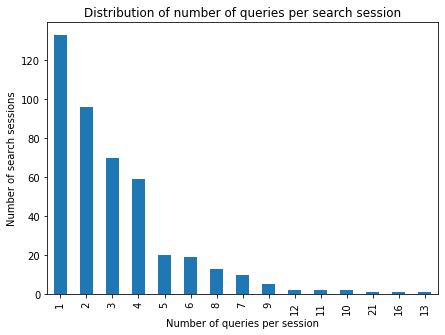

In [68]:
ax = sr_agg['queryUuid']['count'].value_counts().plot.bar(title='Distribution of number of queries per search session',figsize=(7,5))
ax.set_xlabel('Number of queries per session')
ax.set_ylabel('Number of search sessions')

For the length of the search session, there are a lot of zero values (searches with just one query) and the histogram is skewed. I will take the log of the duration to see the distribution better, and then add a plot of the density in normal space below. 

Text(0.5, 0, 'Log(Length of search session in sec)')

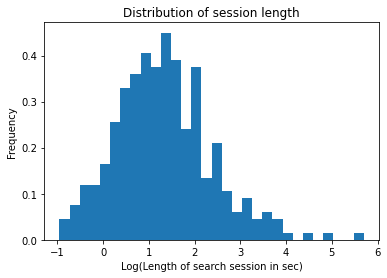

In [74]:
ax2 = sr_agg['event_ts']['duration'][sr_agg['event_ts']['duration']!=0].apply('log').plot.hist(bins=30, title = 'Distribution of session length', density=True)
#sr_agg['event_ts']['time interval'][sr_agg['event_ts']['time interval']!=0].value_counts()
ax2.set_xlabel('Log(Length of search session in sec)')

Text(0.5, 0, 'Length of search session (sec)')

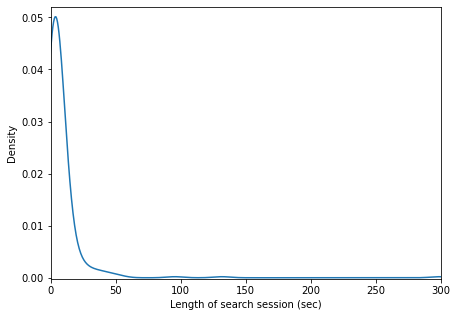

In [75]:
ax3 = sr_agg['event_ts']['duration'][sr_agg['event_ts']['duration']!=0].plot.density(xlim=[0,300], ylim=[-0.0002,0.052], figsize=(7,5))
ax3.set_xlabel('Length of search session (sec)')

One could try to see whether longer search sessions, or sessions with many queries, were less successful.

We could also join the two aggregate tables on search id so that we have all of the information in one table.

In [76]:
agg = pd.merge(left=cs_agg, right=sr_agg, how='inner', on='searchUuid')
agg

pageId     endResult  \
                                                            set           set   
searchUuid                                                                      
005dcb9d-c116-4186-89dc-d2b7e5f557a7                   {search}  {navigation}   
008fed36-70b2-4e73-9cf1-cc875092750d                   {search}  {navigation}   
02f1dc00-90df-45b7-b6cb-b8e15531919d                   {search}    {playback}   
03179219-c7a5-4cbe-9a64-ff3e5e07c355  {search_viewallplaylists}  {navigation}   
03331c06-c612-471e-aa91-7dcd8185b7ae                   {search}  {navigation}   
...                                                         ...           ...   
fdb7d639-9af4-409e-beca-94910f2b1597                   {search}  {navigation}   
fe76177e-9c5d-4e14-baed-ce7f1922c901                   {search}  {navigation}   
ff2ca07b-b23d-406c-b5cf-b687f992a5ac                   {search}  {navigation}   
ff3c75db-f17f-44f9-909d-d2b40b128ca1                   {search}  {navigation}   
ffd931ae-fba5-464f-a1c4-44c83bc3bc17                   {search}  {navigation}   

                                     contentType contentPlacement  \
                                             set              min   
searchUuid                                                          
005dcb9d-c116-4186-89dc-d2b7e5f557a7    {artist}                0   
008fed36-70b2-4e73-9cf1-cc875092750d    {artist}                0   
02f1dc00-90df-45b7-b6cb-b8e15531919d     {track}                2   
03179219-c7a5-4cbe-9a64-ff3e5e07c355  {playlist}               22   
03331c06-c612-471e-aa91-7dcd8185b7ae    {artist}                0   
...                                          ...              ...   
fdb7d639-9af4-409e-beca-94910f2b1597     {album}                0   
fe76177e-9c5d-4e14-baed-ce7f1922c901    {artist}                0   
ff2ca07b-b23d-406c-b5cf-b687f992a5ac    {artist}                0   
ff3c75db-f17f-44f9-909d-d2b40b128ca1    {artist}                0   
ffd931ae-fba5-464f-a1c4-44c83bc3bc17    {artist}                0   

                                                  query queryUuid event_ts  \
                                                    max     count duration   
searchUuid                                                                   
005dcb9d-c116-4186-89dc-d2b7e5f557a7                tre         2    1.482   
008fed36-70b2-4e73-9cf1-cc875092750d           limp biz         1    0.000   
02f1dc00-90df-45b7-b6cb-b8e15531919d            powers          2    1.519   
03179219-c7a5-4cbe-9a64-ff3e5e07c355  quiet storm radio         5   49.413   
03331c06-c612-471e-aa91-7dcd8185b7ae          black tux         5    7.912   
...                                                 ...       ...      ...   
fdb7d639-9af4-409e-beca-94910f2b1597           only for         2    2.750   
fe76177e-9c5d-4e14-baed-ce7f1922c901                nri         9   16.243   
ff2ca07b-b23d-406c-b5cf-b687f992a5ac            Tory La         6    7.258   
ff3c75db-f17f-44f9-909d-d2b40b128ca1                 2p         1    0.000   
ffd931ae-fba5-464f-a1c4-44c83bc3bc17           chlidish         3    3.993   

                                                             dt user_id  
                                                max         max     max  
searchUuid                                                               
005dcb9d-c116-4186-89dc-d2b7e5f557a7  1602639819343  2020-10-14     351  
008fed36-70b2-4e73-9cf1-cc875092750d  1602637241764  2020-10-14     147  
02f1dc00-90df-45b7-b6cb-b8e15531919d  1602637666230  2020-10-14     258  
03179219-c7a5-4cbe-9a64-ff3e5e07c355  1602640234563  2020-10-14      64  
03331c06-c612-471e-aa91-7dcd8185b7ae  1602640478910  2020-10-14      45  
...                                             ...         ...     ...  
fdb7d639-9af4-409e-beca-94910f2b1597  1602638546295  2020-10-14     125  
fe76177e-9c5d-4e14-baed-ce7f1922c901  1602639631257  2020-10-14      32  
ff2ca07b-b23d-406c-b5cf-b687f992a5ac  1602639518

## Zero search results

In [77]:
no_results = search_query[(search_query['topresults']=='[]') & (search_query['trackresults']=='[]')]
no_results

,event_name,query,queryId,topresults,trackresults,artistresults,albumresults,videoresults,playlistresults,responseTime,dt,user_id,idtopresults
0,search_query,art of story telling pt,00db2706-a334-41f1-aeb5-bac027618ff3,[],[],[],[],[],[],"{track=19, video=7, artist=17, album=19, playl...",2020-10-14,258,[]
7,search_query,get out and get something cylo green,2a3ef482-d117-4a8e-9e94-88e575af932b,[],[],[],[],[],[],"{track=20, video=6, artist=15, album=18, playl...",2020-10-14,187,[]
72,search_query,Newline cinema,6f144bf3-676a-42ef-b70b-34332e001e23,[],[],[],[],[],[],"{track=7, video=3, artist=9, album=5, playlist...",2020-10-14,351,[]
282,search_query,jay wsyee,7cc719ea-3750-4420-9421-c234b180d280,[],[],[],[],[],[],"{track=7, video=4, artist=8, album=7, playlist...",2020-10-14,55,[]
285,search_query,tp 100 2020,8a685fb3-d3a6-40ae-8760-90157d19b526,[],[],[],[],[],[],"{track=34, video=3, artist=32, album=32, playl...",2020-10-14,277,[]
294,search_query,Neline cinema,461f0391-eb37-4f31-afa7-415e868b60b6,[],[],[],[],[],[],"{track=42, video=5, artist=10, album=7, playli...",2020-10-14,351,[]
295,search_query,so how's your gir,c2eb84bd-a7df-4494-aaa5-553d1976b4fc,[],[],[],[],[],[],"{track=43, video=6, artist=15, album=12, playl...",2020-10-14,28,[]
342,search_query,get out and get something cylo,dbdcd722-c4f3-457e-aff9-3ab1cfd2b885,[],[],[],[],[],[],"{track=18, video=5, artist=16, album=15, playl...",2020-10-14,187,[]
365,search_query,get out and get something cylo gree,ebfeb23d-0f2d-48ba-a808-ebbf6a4d8322,[],[],[],[],[],[],"{track=39, video=7, artist=29, album=42, playl...",2020-10-14,187,[]
425,search_query,get out and get something goodie mo,897e4c55-4089-40cb-a23b-157809c7e892,[],[],[],[],[],[],"{track=48, video=21, artist=18, album=32, play...",2020-10-14,187,[]


We find that it is enough for this one hour chunk of data to require top results and track results to be empty in order to cover all cases with empty search results. We will probably need to add extra conditions on artist, album, etc. when we move to a larger dataset.

In [78]:
no_results['queryId']

0       00db2706-a334-41f1-aeb5-bac027618ff3
7       2a3ef482-d117-4a8e-9e94-88e575af932b
72      6f144bf3-676a-42ef-b70b-34332e001e23
282     7cc719ea-3750-4420-9421-c234b180d280
285     8a685fb3-d3a6-40ae-8760-90157d19b526
294     461f0391-eb37-4f31-afa7-415e868b60b6
295     c2eb84bd-a7df-4494-aaa5-553d1976b4fc
342     dbdcd722-c4f3-457e-aff9-3ab1cfd2b885
365     ebfeb23d-0f2d-48ba-a808-ebbf6a4d8322
425     897e4c55-4089-40cb-a23b-157809c7e892
450     6ee70e65-1f7c-4c95-a55d-47293a9c80a9
464     ef7e7d27-e655-4e0d-b329-a5f8ae4bc282
555     bc722112-93fc-403b-8645-8d25cf2419f0
589     5fd48457-a35f-454b-be01-582e518d2945
612     785e0e5a-4bcc-4094-a8f1-9b21a5da56f3
753     65f54b71-c53c-475a-a472-c83ca61b0fd0
812     311c7a7c-4b5d-4f5f-b0e6-5e1f1e1dbcdc
888     775b2c7e-a398-4de4-9ab4-00fd798a1a5c
919     5bc11ba3-1f72-4c08-b10d-b05387a777f9
925     94e37da3-6328-4376-8d13-ebeaaca7bae6
1015    58c23d78-cc5f-451a-ae82-2881f5e22956
1020    8cb8973d-c1dd-4904-b37e-8ab4b8c91703
Name: quer

In [79]:
len(no_results)

22

In [80]:
search_query['queryId'].unique().size

1065

In [81]:
no_results_frac = len(no_results) / len(search_query)
no_results_frac

0.020657276995305163

22 of 1065, or 2.07% of queries, have no results. 

We now want to count the search sessions with queries that had no results.

In [82]:
join = pd.merge(left=no_results, right=search_result, how='left', left_on='queryId',right_on='queryUuid')
join

,event_name_x,query_x,queryId,topresults,trackresults,artistresults,albumresults,videoresults,playlistresults,responseTime,dt_x,user_id_x,idtopresults,event_name_y,query_y,searchUuid,queryUuid,event_ts,dt_y,user_id_y
0,search_query,art of story telling pt,00db2706-a334-41f1-aeb5-bac027618ff3,[],[],[],[],[],[],"{track=19, video=7, artist=17, album=19, playl...",2020-10-14,258,[],search_result,art of story telling pt,d64e4ca9-6bac-4737-b399-469688775f49,00db2706-a334-41f1-aeb5-bac027618ff3,1.602639e+12,2020-10-14,258.0
1,search_query,get out and get something cylo green,2a3ef482-d117-4a8e-9e94-88e575af932b,[],[],[],[],[],[],"{track=20, video=6, artist=15, album=18, playl...",2020-10-14,187,[],search_result,get out and get something cylo green,d728a42f-4b72-462f-a3a1-c4a190438237,2a3ef482-d117-4a8e-9e94-88e575af932b,1.602641e+12,2020-10-14,187.0
2,search_query,Newline cinema,6f144bf3-676a-42ef-b70b-34332e001e23,[],[],[],[],[],[],"{track=7, video=3, artist=9, album=5, playlist...",2020-10-14,351,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,search_query,jay wsyee,7cc719ea-3750-4420-9421-c234b180d280,[],[],[],[],[],[],"{track=7, video=4, artist=8, album=7, playlist...",2020-10-14,55,[],search_result,jay wsyee,a7d55194-11c3-4df5-a2f0-11542e81a0f6,7cc719ea-3750-4420-9421-c234b180d280,1.602639e+12,2020-10-14,55.0
4,search_query,tp 100 2020,8a685fb3-d3a6-40ae-8760-90157d19b526,[],[],[],[],[],[],"{track=34, video=3, artist=32, album=32, playl...",2020-10-14,277,[],search_result,tp 100 2020,d18a8d2e-58d5-4384-a1b8-2dc8945d03af,8a685fb3-d3a6-40ae-8760-90157d19b526,1.602639e+12,2020-10-14,277.0
5,search_query,Neline cinema,461f0391-eb37-4f31-afa7-415e868b60b6,[],[],[],[],[],[],"{track=42, video=5, artist=10, album=7, playli...",2020-10-14,351,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,search_query,so how's your gir,c2eb84bd-a7df-4494-aaa5-553d1976b4fc,[],[],[],[],[],[],"{track=43, video=6, artist=15, album=12, playl...",2020-10-14,28,[],search_result,so how's your gir,38b41f4d-f0d3-4b79-ba3b-73f358a7738e,c2eb84bd-a7df-4494-aaa5-553d1976b4fc,1.602639e+12,2020-10-14,28.0
7,search_query,get out and get something cylo,dbdcd722-c4f3-457e-aff9-3ab1cfd2b885,[],[],[],[],[],[],"{track=18, video=5, artist=16, album=15, playl...",2020-10-14,187,[],search_result,get out and get something cylo,d728a42f-4b72-462f-a3a1-c4a190438237,dbdcd722-c4f3-457e-aff9-3ab1cfd2b885,1.602641e+12,2020-10-14,187.0
8,search_query,get out and get something cylo gree,ebfeb23d-0f2d-48ba-a808-ebbf6a4d8322,[],[],[],[],[],[],"{track=39, video=7, artist=29, album=42, playl...",2020-10-14,187,[],search_result,get out and get something cylo gree,d728a42f-4b72-462f-a3a1-c4a190438237,ebfeb23d-0f2d-48ba-a808-ebbf6a4d8322,1.602641e+12,2020-10-14,187.0
9,search_query,get out and get something goodie mo,897e4c55-4089-40cb-a23b-157809c7e892,[],[],[],[],[],[],"{track=48, video=21, artist=18, album=32, play...",2020-10-14,187,[],search_result,get out and get something goodie mo,d728a42f-4b72-462f-a3a1-c4a190438237,897e4c55-4089-40cb-a23b-157809c7e892,1.602641e+12,2020-10-14,187.0


Some of the queries don't have a corresponding search Id in search_result, so we don't know which search they correspond to. It could be outside of the time interval or there could be some other reason. 

We will just do an inner join instead and keep the ones we can find the search Id for.

In [83]:
join = pd.merge(left=no_results, right=search_result, how='inner', left_on='queryId',right_on='queryUuid')
join.head(3)

,event_name_x,query_x,queryId,topresults,trackresults,artistresults,albumresults,videoresults,playlistresults,responseTime,dt_x,user_id_x,idtopresults,event_name_y,query_y,searchUuid,queryUuid,event_ts,dt_y,user_id_y
0,search_query,art of story telling pt,00db2706-a334-41f1-aeb5-bac027618ff3,[],[],[],[],[],[],"{track=19, video=7, artist=17, album=19, playl...",2020-10-14,258,[],search_result,art of story telling pt,d64e4ca9-6bac-4737-b399-469688775f49,00db2706-a334-41f1-aeb5-bac027618ff3,1602638590355,2020-10-14,258
1,search_query,get out and get something cylo green,2a3ef482-d117-4a8e-9e94-88e575af932b,[],[],[],[],[],[],"{track=20, video=6, artist=15, album=18, playl...",2020-10-14,187,[],search_result,get out and get something cylo green,d728a42f-4b72-462f-a3a1-c4a190438237,2a3ef482-d117-4a8e-9e94-88e575af932b,1602640548942,2020-10-14,187
2,search_query,jay wsyee,7cc719ea-3750-4420-9421-c234b180d280,[],[],[],[],[],[],"{track=7, video=4, artist=8, album=7, playlist...",2020-10-14,55,[],search_result,jay wsyee,a7d55194-11c3-4df5-a2f0-11542e81a0f6,7cc719ea-3750-4420-9421-c234b180d280,1602638789338,2020-10-14,55


We will now group the join by search to count the distinct search sessions.

In [84]:
grouped_nr = join.groupby(by='searchUuid')
grouped_nr.groups

{'0b4b7666-60d4-4f1d-bf3c-2c3198c73b81': Int64Index([9], dtype='int64'),
 '3722c548-2e8e-4507-9668-587ed9322a32': Int64Index([8], dtype='int64'),
 '38b41f4d-f0d3-4b79-ba3b-73f358a7738e': Int64Index([4], dtype='int64'),
 '56b16db2-9141-49da-bb75-d7427452ed67': Int64Index([13], dtype='int64'),
 'a7d55194-11c3-4df5-a2f0-11542e81a0f6': Int64Index([2], dtype='int64'),
 'b2c96bf5-9e7d-4f9d-8fca-98e245858c14': Int64Index([12], dtype='int64'),
 'c1dc675b-3e01-4948-86f9-5afe2df5c4da': Int64Index([15], dtype='int64'),
 'd18a8d2e-58d5-4384-a1b8-2dc8945d03af': Int64Index([3, 10], dtype='int64'),
 'd64e4ca9-6bac-4737-b399-469688775f49': Int64Index([0], dtype='int64'),
 'd728a42f-4b72-462f-a3a1-c4a190438237': Int64Index([1, 5, 6, 7, 11, 14, 17], dtype='int64'),
 'ebdd6ddc-0082-496b-979a-8872cad52b99': Int64Index([16], dtype='int64')}

In [85]:
len(grouped_nr.groups)

11

We will count the distinct search sessions in the result.

In [86]:
join['searchUuid'].unique()

array(['d64e4ca9-6bac-4737-b399-469688775f49',
       'd728a42f-4b72-462f-a3a1-c4a190438237',
       'a7d55194-11c3-4df5-a2f0-11542e81a0f6',
       'd18a8d2e-58d5-4384-a1b8-2dc8945d03af',
       '38b41f4d-f0d3-4b79-ba3b-73f358a7738e',
       '3722c548-2e8e-4507-9668-587ed9322a32',
       '0b4b7666-60d4-4f1d-bf3c-2c3198c73b81',
       'b2c96bf5-9e7d-4f9d-8fca-98e245858c14',
       '56b16db2-9141-49da-bb75-d7427452ed67',
       'c1dc675b-3e01-4948-86f9-5afe2df5c4da',
       'ebdd6ddc-0082-496b-979a-8872cad52b99'], dtype=object)

In [87]:
no_searches_nores = join['searchUuid'].unique().size
no_searches_nores

11

In [88]:
frac_nores_init = no_searches_nores/len(initiate_search)
frac_nores_init

0.01800327332242226

In [89]:
frac_nores_searched = no_searches_nores/search_result['searchUuid'].unique().size
frac_nores_searched

0.02534562211981567

We get 11 search sessions with no results. 

Out of the total 611 initiated searches, that is 1.8%.

Out of the 434 search sessions with actual queries performed, that is 2.53%.